<a href="https://colab.research.google.com/github/sway-db/Convolutional_Neural_Network-Univali/blob/main/Convolutional_Neural_Network_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

Exemplo retirado do site da Tensorflow e Keras

Este tutorial demonstra o treinamento de uma [Rede Neural Convolucional](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) simples para classificar [imagens CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html). Como este tutorial usa a API Sequencial Keras, criar e treinar seu modelo levará apenas algumas linhas de código.



### Primeiramente devemos importar as bibliotecas [Matplotlib](https://matplotlib.org/3.5.3/index.html) e Tensorflow juntamente de sua [API Sequencial Keras](https://keras.io)


In [ ]:
import tensorflow as tf #importa a biblioteca tensorflow apelidada como tf para o programa

from tensorflow.keras import datasets, layers, models #importa alguns modulos da api tensorflow.keras
import matplotlib.pyplot as plt #importa a biblioteca matplotlib apelidada como plt para o programa

### Baixe e prepare o conjunto de dados CIFAR10


O conjunto de dados CIFAR10 contém 60.000 imagens coloridas em 10 classes, com 6.000 imagens em cada classe. O conjunto de dados é dividido em 50.000 imagens de treinamento e 10.000 imagens de teste. As classes são mutuamente exclusivas e não há sobreposição entre elas.

As classes existentes no conjunto são as seguintes:
  Avião (airplane),
  Automóvel (automobile),
  Pássaro (bird),
  Gato (cat),
  Cervo (deer),
  Cachorro (dog),
  Sapo (frog),
  Cavalo (horse),
  Navio (ship),
  Caminhão (truck).

In [ ]:
#declara as variaveis que armazenarao os dados retornados pela funcao "datasets.cifar10.load_data()" que por sua vez carrega um grupo de imagens de 10 classes distintas para o treinamento da IA
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normaliza os valores dos pixels das imagens, dividindo-os por 255.0 para garantir que estejam na faixa entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


### Verifique os dados

Com o objetivo de assegurar a precisão do conjunto de dados, realizaremos a representação gráfica das 25 imagens iniciais presentes no conjunto de treinamento, seguida da exibição do nome da respectiva classe abaixo de cada imagem.


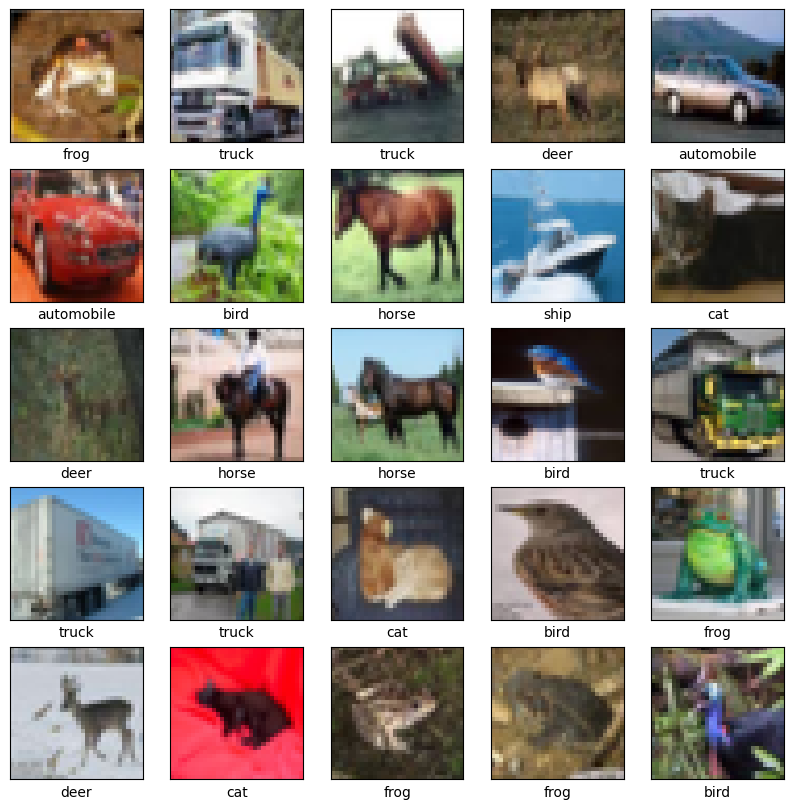

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #cria uma lista contendo os nomes das classes correspondentes as etiquetas do conjunto de dados

plt.figure(figsize=(10,10)) #criacao de figura com tamanho 10x10 polegadas para exibir as imagens
for i in range(25): #inicio de um looping de for com 25 repeticoes
    plt.subplot(5,5,i+1) #cria um subplot na figura anterior com 5 linhas, 5 colunas e um índice específico para cada imagem
    plt.xticks([]) #zera o index eixo x
    plt.yticks([]) #zera o index eixo y
    plt.grid(False) #define como falso o tracado do grid
    plt.imshow(train_images[i]) #exibe a imagem cujo codigo consta no vetor [i] no subplot atual
    plt.xlabel(class_names[train_labels[i][0]]) #define o rotulo do eixo x como o nome da classe correspondente a etiqueta da imagem atual
plt.show() #mostra o resultado das acoes anteriores, resultando num vetor[5,5]

### Crie a base convolucional

 As 6 linhas de código abaixo definem a base convolucional usando um padrão comum: uma pilha de [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) e [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) camadas.

Ao se considerar a entrada de uma Rede Neural Convolucional (CNN), é importante ressaltar que ela recebe tensores com dimensões específicas, sendo estas (image_height, image_width, color_channels), sem considerar o tamanho do lote de dados. Caso não esteja familiarizado com essas dimensões, é válido mencionar que color_channels refere-se aos canais de cor (R, G, B) presentes na imagem. Neste exemplo em particular, a configuração da CNN será definida para processar entradas com o formato (32, 32, 3), o qual corresponde ao formato das imagens no conjunto de dados CIFAR. Essa configuração pode ser realizada ao passar o argumento input_shape para a primeira camada da CNN, garantindo assim a conformidade das dimensões dos dados de entrada.

Uma breve explicação sobre [ReLU](https://arxiv.org/abs/1803.08375)


In [ ]:
model = models.Sequential() #cria um modelo sequencial vazio
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #adiciona uma camada de convolucao 2D com 32 filtros, funcao de ativacao relu e uma forma de entrada de (32, 32, 3) para imagens coloridas de 32x32 pixels
model.add(layers.MaxPooling2D((2, 2))) #adiciona uma camada de pooling maxima 2D com uma janela de 2x2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #adiciona outra camada de convolução 2D com 64 filtros e função de ativação relu
model.add(layers.MaxPooling2D((2, 2))) #adiciona outra camada de pooling máxima 2D
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #adiciona outra camada de convolução 2D com 64 filtros e função de ativação relu

Exibindo a arquitetura do modelo:

In [ ]:
model.summary() #exibe um resumo do modelo no console

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

No trecho de código anterior, é possível observar que a saída de cada camada Conv2D e MaxPooling2D é representada por um tensor tridimensional com formato (altura, largura, canais). É importante notar que as dimensões de largura e altura tendem a diminuir à medida que a rede se aprofunda. O número de canais de saída para cada camada Conv2D é determinado pelo primeiro argumento passado (por exemplo, 32 ou 64). Geralmente, à medida que as dimensões de largura e altura se reduzem, é viável (do ponto de vista computacional) adicionar um maior número de canais de saída em cada camada Conv2D. Isso permite que a rede aprenda e extraia características mais complexas e abstratas à medida que avança nas camadas convolucionais.

### Adicione camadas densas no topo

Para completar o modelo, é necessário direcionar o último tensor de saída da base convolucional, o qual possui uma forma (4, 4, 64), para uma ou mais camadas densas, a fim de realizar a classificação. Vale ressaltar que as camadas densas requerem vetores como entrada, ou seja, uma dimensão unidimensional (1D), enquanto a saída atual consiste em um tensor tridimensional (3D). Nesse sentido, a primeira etapa consiste em "achatar" (ou desenrolar) o tensor 3D para convertê-lo em um vetor 1D. Em seguida, uma ou mais camadas densas são adicionadas no topo do modelo. Considerando que o conjunto de dados CIFAR possui 10 classes de saída, uma camada densa final é utilizada, contendo 10 unidades de saída para a classificação adequada dos dados.

In [ ]:
model.add(layers.Flatten()) #adiciona uma camada de achatamento que converte os recursos 2D em um vetor 1D
model.add(layers.Dense(64, activation='relu')) #adiciona uma camada densa com 64 unidades e funcao de ativacao relu
model.add(layers.Dense(10)) #adiciona a camada de saida com 10 unidades correspondentes as 10 classes no conjunto de dados CIFAR-10

Agora exibimos a arquitetura novamente, aqui constará ela por completo:

In [ ]:
model.summary()#exibe um resumo do modelo no console que já está alimentado com novos dados

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

O resumo da rede mostra que (4, 4, 64) as saídas foram achatadas em vetores de forma (1024) antes de passar por duas camadas densas.

### Compila e treina o modelo

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #compila o modelo configurando o otimizador Adam, uma metodo para medir a precisao

history = model.fit(train_images, train_labels, epochs=7,
                    validation_data=(test_images, test_labels)) #treina o modelo usando os dados de treinamento, por n passos, e usa os dados de teste para validação durante o treinamento.

Epoch 1/7
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5248 - accuracy: 0.4447 - val_loss: 1.2123 - val_accuracy: 0.5659
Epoch 2/7
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1364 - accuracy: 0.5988 - val_loss: 1.0805 - val_accuracy: 0.6206
Epoch 3/7
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9888 - accuracy: 0.6522 - val_loss: 0.9521 - val_accuracy: 0.6663
Epoch 4/7
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8928 - accuracy: 0.6867 - val_loss: 0.9025 - val_accuracy: 0.6859
Epoch 5/7
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8166 - accuracy: 0.7163 - val_loss: 0.9042 - val_accuracy: 0.6847
Epoch 6/7
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7562 - accuracy: 0.7343 - val_loss: 0.8724 - val_accuracy: 0.6987
Epoch 7/7
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7045 - accuracy: 0.7529 - val_loss: 0.8932 - val_accuracy: 0.693

### Avalie o modelo

313/313 - 1s - loss: 0.8932 - accuracy: 0.6939 - 729ms/epoch - 2ms/step


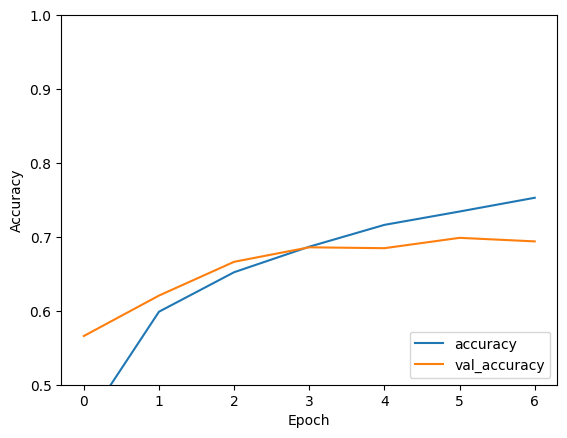

In [ ]:
#exibe um grafico para medir a precisao do modelo
plt.plot(history.history['accuracy'], label='accuracy') #cria um grafico para exibir accuracy
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') #cria um grafico para exibir val_accuracy
plt.xlabel('Epoch') #eixo x se refere a quantidade de passos feitos
plt.ylabel('Accuracy') #eixo y se refere a precisao
plt.ylim([0.5, 1]) #define os limites do eixo y do gráfico, mostrando a faixa de 0.5 a 1 para a precisao.
plt.legend(loc='lower right') #adiciona uma legenda no canto inferior direito do gráfico, mostrando a legenda 'accuracy' e 'val_accuracy'.

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #avalia o modelo usando os dados de teste e calcula a perda e a precisao do modelo

In [ ]:
print(test_acc) #exibe as informacoes de precisao do modelo em floating point

0.6938999891281128


Sua CNN simples alcançou uma precisão de teste de mais de 70%. Nada mal para algumas linhas de código! Para outro estilo de CNN, confira o exemplo de [início rápido do TensorFlow 2 para especialistas](https://www.tensorflow.org/tutorials/quickstart/advanced) que usa a API de subclasse Keras e `tf.GradientTape`.

## Testa o modelo imagem por imagem selecionada manualmente

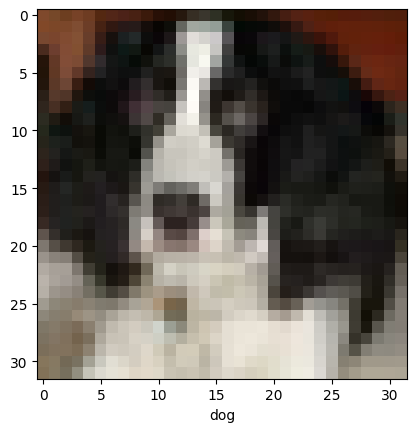

1/1 [==============================] - 0s 30ms/step
[[-5.814431   -3.7143986  -1.1342685   5.179931    0.2228571   6.0258703
  -0.04001205 -1.2331198  -5.4175506  -3.3399289 ]]


In [ ]:
import numpy as np #importa a biblioteca numpy, biblioteca cientifica para manipulacao de vetores
num_image = 230 #variavel para definir a imagem
plt.imshow(test_images[num_image]) #exibe a imagem
plt.xlabel(class_names[test_labels[num_image][0]]) #exibe a classe (nao deduzida) da imagem
plt.show() #imprime os dados anteriores na tela
image2test = test_images[num_image] #alimenta a variavel com o numero da imagem selecionado anteriormente
image2test = image2test.reshape((-1,32,32,3)) #prepara a imagem para alimentar o modelo, ajustando suas dimensoes para serem compativeis com a entrada da rede neural convolucional.
print(model.predict(image2test)) #imprime o conjunto de dados do modelo para deduzir qual classe pertence a imagem, o maior numero prevalece

#['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
#     0            1           2      3       4     5       6        7       8       9